In [1]:
from environments.pickplace_environment import SimplifyPickEnvWithoutLangReward,SimplifyPickOrPlaceEnvWithoutLangReward
import numpy as np
import matplotlib.pyplot as plt
from environments.utils import mouse_demo
from tasks.task import PutBlockInBowl
from agents.LLMRL import LLMSAC,GuideSAC
import cv2

pybullet build time: May 20 2022 19:44:17
2023-10-06 20:34:25.968601: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-06 20:34:25.997894: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-06 20:34:26.899208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from PIL import Image
import torch
from reward.detector import VILD

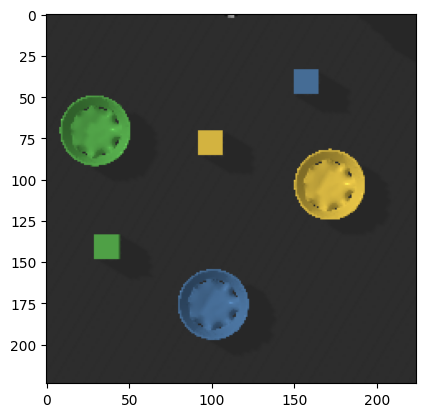

In [3]:
image_path = "reward/tmp/color.png"
image = Image.open(image_path)
plt.imshow(image)

In [4]:
vild = VILD()


Instructions for updating:
Use `tf.saved_model.load` instead.


2023-10-06 20:34:31.616243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-06 20:34:31.617185: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-06 20:34:31.617284: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

INFO:tensorflow:Restoring parameters from ./reward/image_path_v2/variables/variables


2023-10-06 20:34:32.380431: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled


2023-10-06 20:34:35.498857: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-10-06 20:34:38.821021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-06 20:34:40.073639: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 974.03MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-10-06 20:34:40.073689: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 974.03MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-10-06 20:34:40.073717: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (G

Time taken: 7.486s
Building text embeddings...
Found a bowl with score: 0.30782714 with position: [71.58515930175781, 29.420217514038086]
Found a bowl with score: 0.30337512 with position: [176.64483642578125, 101.22816467285156]
Found a bowl with score: 0.30009094 with position: [103.9920425415039, 171.45538330078125]
Found a blocks with score: 0.25856802 with position: [141.233154296875, 36.755191802978516]
Found a bowl with score: 0.2582459 with position: [183.10833740234375, 127.28834533691406]
Found a blocks with score: 0.257811 with position: [41.43505096435547, 157.49676513671875]
Found a blocks with score: 0.2560316 with position: [78.43983459472656, 99.42058563232422]
Found 12 objects


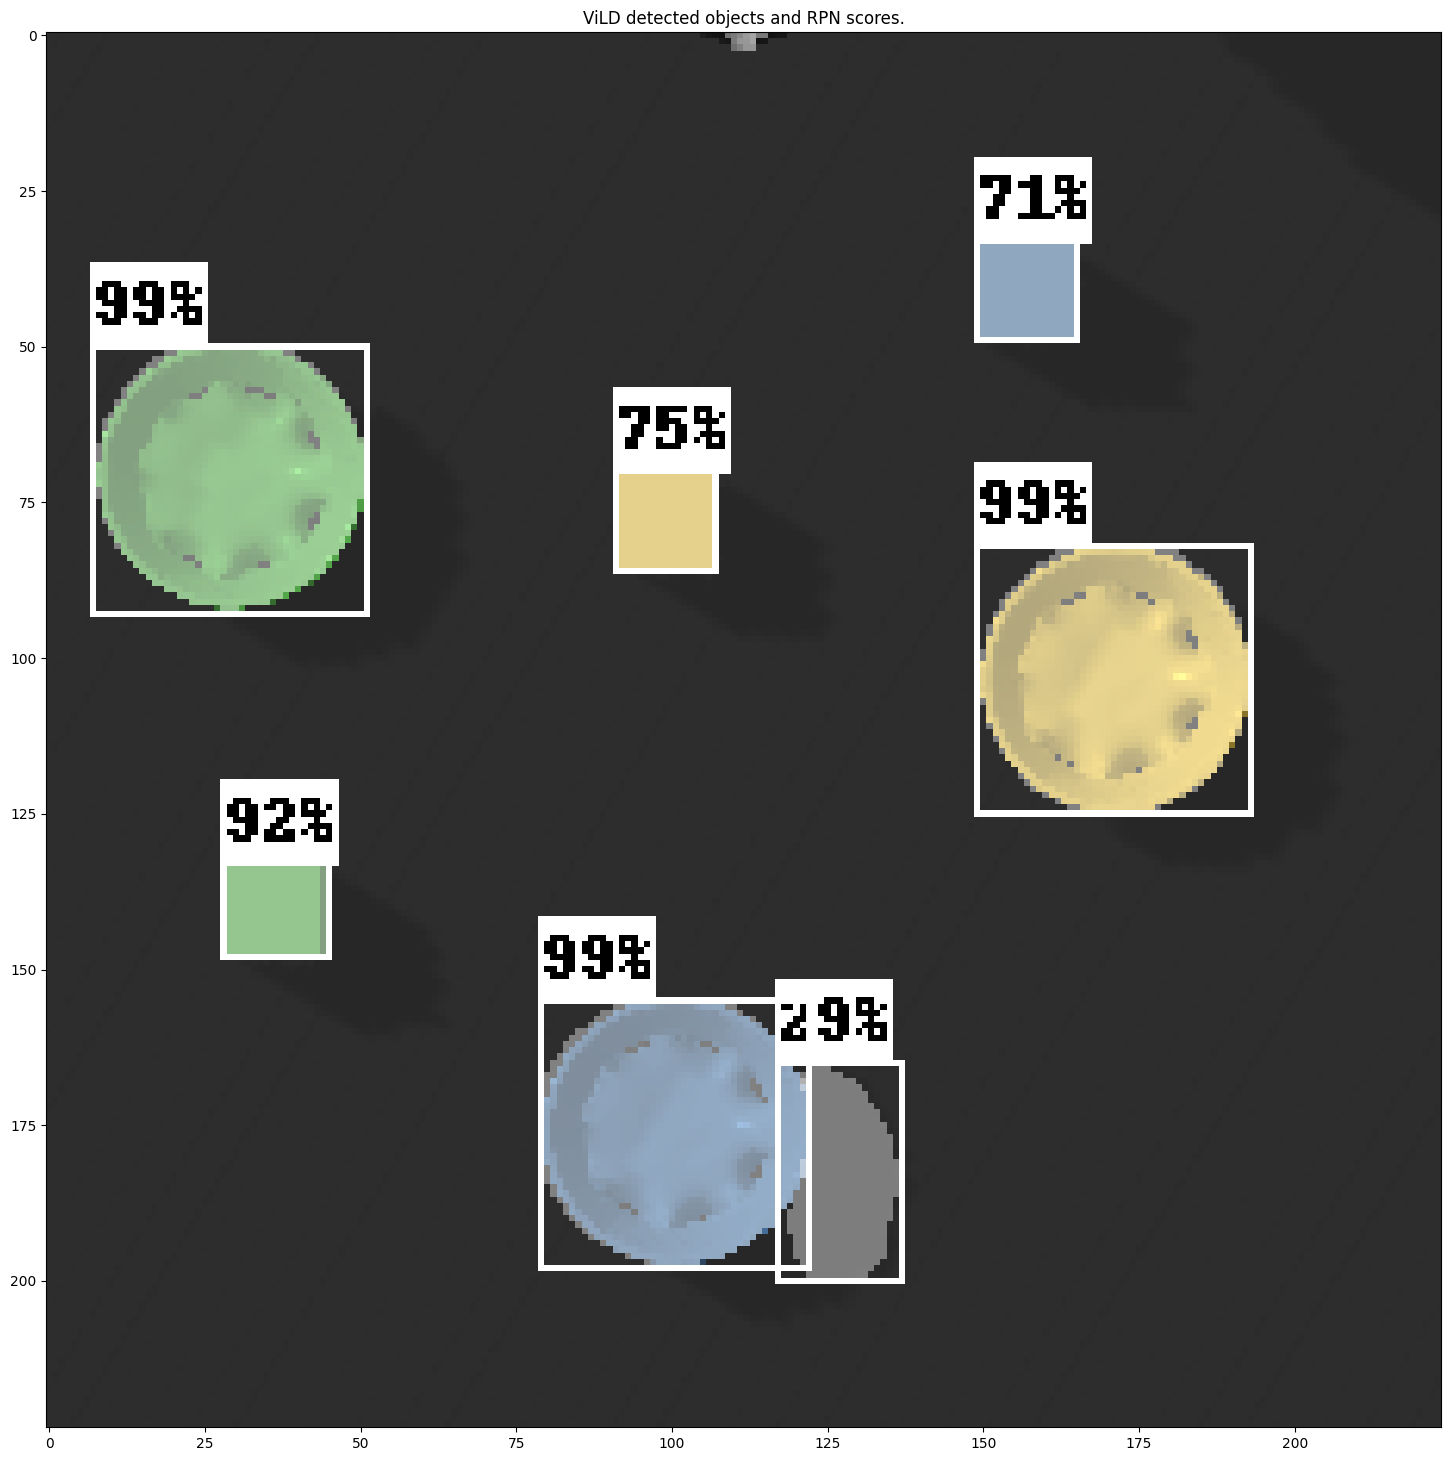

([('bowl',
   [71.58515930175781, 29.420217514038086],
   [50, 7, 93, 51],
   0.30782714),
  ('bowl',
   [176.64483642578125, 101.22816467285156],
   [155, 79, 198, 122],
   0.30337512),
  ('bowl',
   [103.9920425415039, 171.45538330078125],
   [82, 149, 125, 193],
   0.30009094),
  ('blocks',
   [141.233154296875, 36.755191802978516],
   [133, 28, 148, 45],
   0.25856802),
  ('bowl',
   [183.10833740234375, 127.28834533691406],
   [165, 117, 200, 137],
   0.2582459),
  ('blocks',
   [41.43505096435547, 157.49676513671875],
   [33, 149, 49, 165],
   0.257811),
  ('blocks',
   [78.43983459472656, 99.42058563232422],
   [70, 91, 86, 107],
   0.2560316)],
 array([[[45, 45, 45],
         [45, 45, 45],
         [44, 44, 44],
         ...,
         [39, 39, 39],
         [39, 39, 39],
         [39, 39, 39]],
 
        [[45, 45, 45],
         [43, 43, 43],
         [45, 45, 45],
         ...,
         [39, 39, 39],
         [39, 39, 39],
         [39, 39, 39]],
 
        [[45, 45, 45],
      

In [5]:
vild.vild_detect(image_path,["blocks","bowl"],verbose= True)